In [1]:
# Import packages
# import pandas as pd
# import numpy as np
# from sklearn import linear_model
# import requests
# from nba_api.stats import endpoints
# from matplotlib import pyplot as plt


In [2]:

# Access the leagueleaders module through endpoints & assign the class to "data"
# data = endpoints.leagueleaders.LeagueLeaders() 
# df = data.league_leaders.get_data_frame()
# df.describe


In [3]:
# Import packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
# from nba_api.stats import endpoints
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup


In [4]:
# Inputs:
year = 2014
stats = 'advanced' # 'basic' / 'advanced' (with PER)
MIN_GAMES = 20 # players with less games will be filtered out

In [32]:
if stats is 'basic':
    url = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'.format(year)
elif stats is 'advanced':
    url = 'https://www.basketball-reference.com/leagues/NBA_{}_advanced.html'.format(year) # advanced statistics - with PER
else:
    print("Unknown stats mode: Please choose 'basic' / 'advanced'")
print('fetching url:\n{}'.format(url))

fetching url:
https://www.basketball-reference.com/leagues/NBA_2014_advanced.html


In [33]:
def fetch_data(url):
    r = requests.get(url)
    r_html = r.text
    soup = BeautifulSoup(r_html,'html.parser')

    table = soup.find_all(class_="full_table")

    # Extracting List of column names
    head = soup.find(class_="thead")
    column_names_raw = [head.text for item in head][0]
    column_names_polished = column_names_raw.replace("\n",",").split(",")[2:-1]
#     column_names_polished = list(filter(lambda f: f != '\xa0', column_names_polished)) # remove empty columns
    #     print(column_names_polished)
    #     print(len(column_names_polished))

    # Extracting full list of player_data
    players=[]
    for i in range(len(table)):
        player_=[]
        for td in table[i].find_all("td"):
            player_.append(td.text)
        players.append(player_)
    df = pd.DataFrame(players, columns=column_names_polished).set_index("Player")
    return df
# df

In [34]:
df = fetch_data(url)

In [41]:
len(df.columns)

25

In [37]:
# Convert columns to numeric
columns_to_convert = ['Age','G','MP','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%',
                    'TOV%','USG%','OWS' ,'DWS','WS','WS/48','OBPM','DBPM','BPM','VORP']

In [38]:
def convert_df_to_numeric(cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col])

In [39]:
def preprocess_df(columns_to_convert):
    # df['Player'] = df['Player'].str.replace('*', '') # Cleaning: Some names have * at the end
    #cleaning the player's name from occasional special characters
    df.index = df.index.str.replace('*', '')
    df.drop(columns=['\xa0'], inplace=True)
    df.replace('', np.nan, inplace=True) # convert '' to nan in order to use dropna
    df.dropna(inplace=True)  # Remove players with empty stats (didn't play enough)

    # Remove Players with multiple positions (only 4 such players)
    for pname, pstas in df.iterrows():
        if pstas['Pos'] in ['SG-PG', 'PF-SF', 'SG-SF', 'SF-PF']:
            df.drop(pname, inplace=True)
    
    convert_df_to_numeric(columns_to_convert)
    # Remove players with less than min_games
    df.drop(df[df.G < MIN_GAMES].index, inplace=True)

In [40]:
preprocess_df(columns_to_convert)

In [ ]:

# # Convert columns to numeric
# dict_columns_to_convert = {'Age' : 'int32',
#                            'G' : 'int32',
#                           'MP' : 'int32',
#                           'PER': 'float32',
#                           'TS%' : 'float32',
#                             '3PAr'      : 'float32',
#                             'FTr'      : 'float32',
#                             'ORB%'      : 'float32',
#                             'DRB%'      : 'float32',
#                             'TRB%'      : 'float32',
#                             'AST%'      : 'float32',
#                             'STL%'      : 'float32',
#                             'BLK%'      : 'float32',
#                             'TOV%'      : 'float32',
#                             'USG%'      : 'float32',
#                             'OWS'      : 'float32',
#                             'DWS'      : 'float32',
#                             'WS'      : 'float32',
#                             'WS/48'     : 'float32',
#                             'OBPM'      : 'float32',
#                             'DBPM'      : 'float32',
#                             'BPM'      : 'float32',
#                             'VORP'      : 'float32'}


In [42]:
kd = df.loc['Kevin Durant'] #-- when using .set_index("Player"), this is how to reach a player stats line
kd

Pos         SF
Age         25
Tm         OKC
G           81
MP        3122
PER       29.8
TS%      0.635
3PAr     0.291
FTr      0.477
ORB%       2.2
DRB%      18.6
TRB%      10.8
AST%      26.7
STL%       1.7
BLK%       1.5
TOV%      12.2
USG%        33
OWS       14.8
DWS        4.4
WS        19.2
WS/48    0.295
OBPM       8.8
DBPM       1.4
BPM       10.2
VORP       9.6
Name: Kevin Durant, dtype: object

In [43]:
df

,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,SF,23,TOT,63,847,10.1,0.520,0.106,0.376,9.5,...,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1
Steven Adams,C,20,OKC,81,1197,11.2,0.541,0.000,0.735,14.1,...,22.5,11.7,0.9,1.9,2.9,0.114,-3.1,0.9,-2.2,-0.1
Jeff Adrien,PF,27,TOT,53,961,17.4,0.553,0.000,0.433,11.8,...,10.6,17.3,1.6,1.1,2.7,0.134,0.0,-0.9,-0.9,0.3
Arron Afflalo,SG,28,ORL,73,2552,16.0,0.574,0.297,0.332,1.4,...,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1
Alexis Ajinça,C,25,NOP,56,951,14.6,0.589,0.004,0.269,11.3,...,18.4,16.3,1.2,0.9,2.1,0.104,-2.7,0.1,-2.6,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tony Wroten,PG,20,PHI,72,1765,12.9,0.493,0.233,0.403,4.1,...,17.7,27.7,-1.8,0.9,-0.9,-0.025,-1.9,-1.8,-3.7,-0.7
Nick Young,SG,28,LAL,64,1810,16.0,0.564,0.394,0.321,1.7,...,8.6,26.8,2.3,0.3,2.5,0.067,1.4,-1.9,-0.5,0.7
Thaddeus Young,PF,25,PHI,79,2718,16.6,0.512,0.228,0.178,6.3,...,10.7,24.1,1.2,2.3,3.5,0.062,0.4,-0.5,-0.1,1.3


In [44]:
df.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,26.502439,60.224390,1416.634146,13.471220,0.527102,0.262305,0.277595,5.414634,14.888537,10.151707,...,14.074878,18.687073,1.580000,1.448049,3.029268,0.084795,-0.955122,-0.056341,-1.010488,0.737561
std,4.144250,19.105892,834.667234,4.593474,0.058204,0.211117,0.148366,3.916466,5.878496,4.599751,...,5.147884,4.918570,2.148165,1.194224,3.010385,0.059896,2.619671,1.123247,2.931377,1.380126
min,19.000000,20.000000,59.000000,-1.700000,0.220000,0.000000,0.000000,0.000000,5.300000,3.300000,...,3.300000,4.900000,-1.800000,0.000000,-0.900000,-0.132000,-9.000000,-3.200000,-10.000000,-1.100000
25%,23.000000,46.000000,677.250000,10.700000,0.498000,0.016000,0.171000,2.200000,10.100000,6.200000,...,10.725000,14.825000,0.100000,0.500000,0.725000,0.049000,-2.600000,-0.800000,-2.700000,-0.100000
50%,26.000000,65.500000,1396.000000,13.250000,0.531000,0.266000,0.252500,4.000000,13.550000,9.250000,...,13.000000,18.250000,1.000000,1.100000,2.200000,0.085500,-0.900000,-0.100000,-1.100000,0.300000
75%,29.000000,77.000000,2156.000000,16.175000,0.564000,0.429750,0.344250,8.200000,18.800000,13.300000,...,16.200000,22.475000,2.575000,2.100000,4.500000,0.122750,0.575000,0.700000,0.700000,1.200000
max,39.000000,83.000000,3122.000000,29.800000,0.730000,0.836000,0.944000,17.500000,33.800000,23.000000,...,57.100000,34.400000,14.800000,6.600000,19.200000,0.295000,8.800000,3.600000,10.200000,9.600000


(array([ 1.,  1.,  0.,  2.,  1.,  6.,  6.,  6.,  7., 17., 24., 26., 34.,
        41., 48., 34., 33., 35., 22., 15., 20.,  9.,  4.,  4.,  4.,  4.,
         0.,  3.,  1.,  0.,  2.]),
 array([-1.7       , -0.68387097,  0.33225806,  1.3483871 ,  2.36451613,
         3.38064516,  4.39677419,  5.41290323,  6.42903226,  7.44516129,
         8.46129032,  9.47741935, 10.49354839, 11.50967742, 12.52580645,
        13.54193548, 14.55806452, 15.57419355, 16.59032258, 17.60645161,
        18.62258065, 19.63870968, 20.65483871, 21.67096774, 22.68709677,
        23.70322581, 24.71935484, 25.73548387, 26.7516129 , 27.76774194,
        28.78387097, 29.8       ]),
 <a list of 31 Patch objects>)

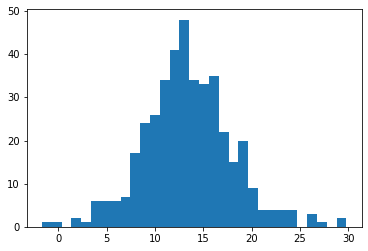

In [45]:
plt.hist(df['PER'], bins=31)

In [46]:
max_per = df[df['PER'] == df['PER'].max()]
print('Player with maximum PER for year {} is {} with PER of {}'.format(year, max_per.index[0], max_per['PER'][0]))


Player with maximum PER for year 2014 is Kevin Durant with PER of 29.8
